In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train_csv = pd.read_csv("/kaggle/input/equity-post-HCT-survival-predictions/train.csv")
train_csv.head()

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223


In [3]:
train_csv.shape

(28800, 60)

### Positive and Negative Class Distribution

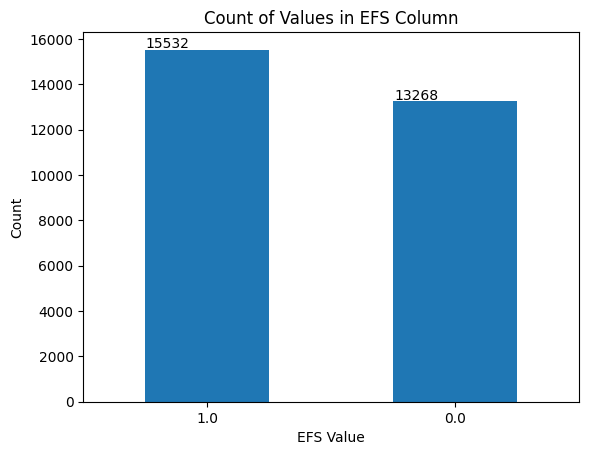

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure()
value_counts = train_csv['efs'].value_counts()

# Create a bar plot
ax = value_counts.plot(kind='bar')
plt.title('Count of Values in EFS Column')
plt.xlabel('EFS Value')
plt.ylabel('Count')
plt.xticks(rotation=0)
# Add the number on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()


Insight : The positive vs negative class is not significantly imbalanced. At the moment it seems good.

# EDA for Categorical Columns

## EDA w.r.t Ethnicity

In [5]:
eth_df = train_csv
#drop all nan rows
eth_df = eth_df.dropna(subset=['ethnicity'])
print("the new df length is : ", len(eth_df))

the new df length is :  28213


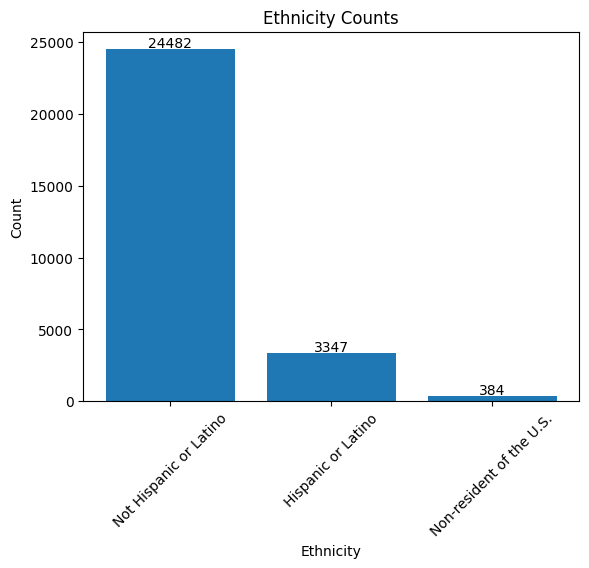

In [6]:
eth_dict = dict(eth_df['ethnicity'].value_counts())
# Create a bar plot
plt.bar(eth_dict.keys(), eth_dict.values())
plt.title('Ethnicity Counts')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add the number on top of each bar
for i, (key, value) in enumerate(eth_dict.items()):
    plt.text(i, value + 100, str(value), ha='center')

plt.show()

### Insight : The imbalance in ethnicity is quite significant

### <span style="color: red;">Question : </span> How is survival among different ethnicities?

Df length =  24482


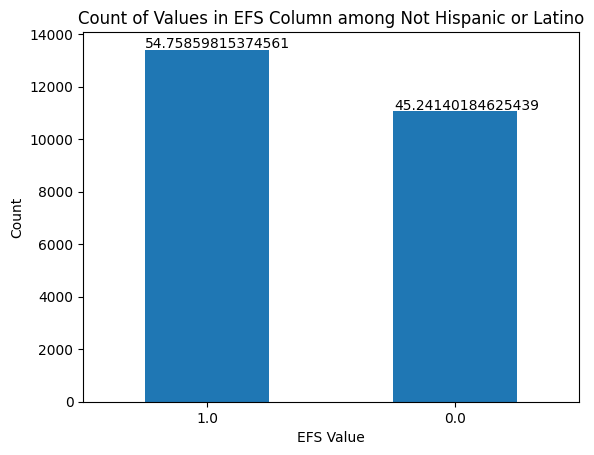

In [9]:
eth_df_not_hsip_or_lat = eth_df[eth_df["ethnicity"] == 'Not Hispanic or Latino']
print("Df length = ",len(eth_df_not_hsip_or_lat))
fig = plt.figure()
value_counts = eth_df_not_hsip_or_lat['efs'].value_counts()

# Create a bar plot
ax = value_counts.plot(kind='bar')
plt.title('Count of Values in EFS Column among Not Hispanic or Latino')
plt.xlabel('EFS Value')
plt.ylabel('Count')
plt.xticks(rotation=0)
# Add the number on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()/24482 * 100), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

Df length =  3347


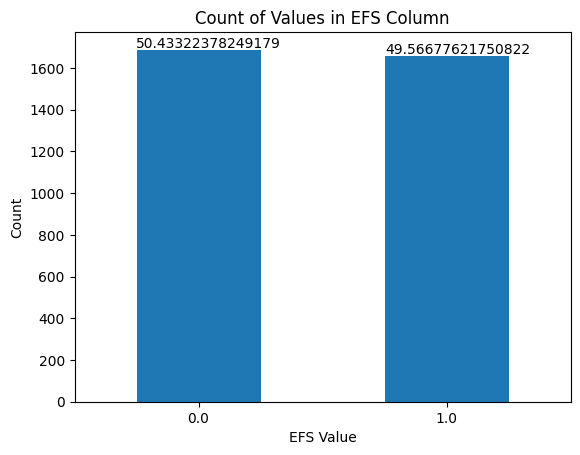

In [8]:
eth_df_hsip_or_lat = eth_df[eth_df["ethnicity"] == 'Hispanic or Latino']
print("Df length = ",len(eth_df_hsip_or_lat))
fig = plt.figure()
value_counts = eth_df_hsip_or_lat['efs'].value_counts()

# Create a bar plot
ax = value_counts.plot(kind='bar')
plt.title('Count of Values in EFS Column among Hispanic or Latino')
plt.xlabel('EFS Value')
plt.ylabel('Count')
plt.xticks(rotation=0)
# Add the number on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()/3347 * 100), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

Df length =  384


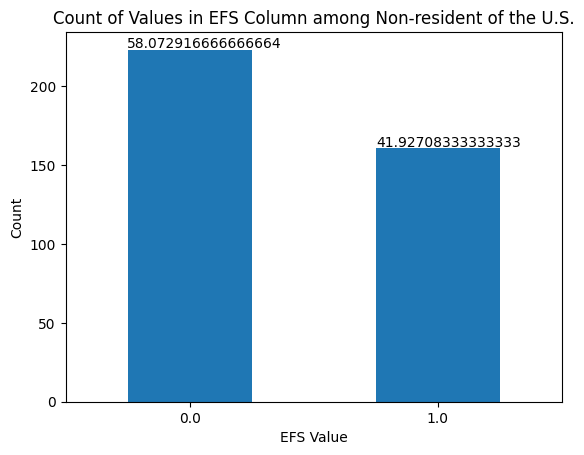

In [10]:
eth_df_non_resident = eth_df[eth_df["ethnicity"] == 'Non-resident of the U.S.']
print("Df length = ",len(eth_df_non_resident))
fig = plt.figure()
value_counts = eth_df_non_resident['efs'].value_counts()

# Create a bar plot
ax = value_counts.plot(kind='bar')
plt.title('Count of Values in EFS Column among Non-resident of the U.S.')
plt.xlabel('EFS Value')
plt.ylabel('Count')
plt.xticks(rotation=0)
# Add the number on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()/len(eth_df_non_resident) * 100), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

### <span style="color: green;">Insights : </span>

* The survival and non survival between different ethnicities is not significantly high.
* Non-residents have the highest difference between survival and non-survival.

## EDA w.r.t Psych dsiturbance 

In [11]:
train_df_psych_disturb  = train_csv
# drop the nan columns
#drop all nan rows
train_df_psych_disturb = train_df_psych_disturb.dropna(subset=['psych_disturb'])
print("the new df length is : ", len(train_df_psych_disturb))

the new df length is :  26738


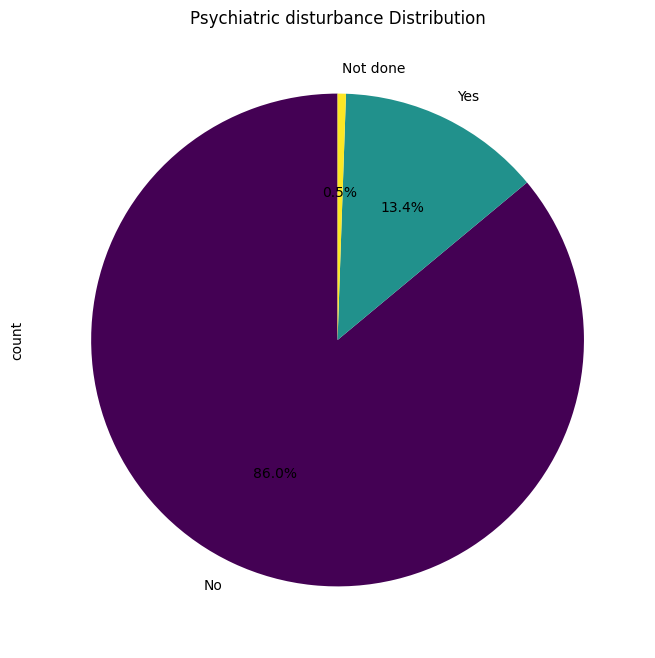

In [16]:
# pie chart of the distribution of the different values of psych_disturb
# Get the value counts for the column
value_counts = train_df_psych_disturb['psych_disturb'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
value_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')

# Add a title
plt.title('Psychiatric disturbance Distribution')

# Equal aspect ratio ensures pie is drawn as a circle
plt.gca().set_aspect('equal')

# Show the plot
plt.show()

Insight :

- 86% does not have Psychiatric disturbance.
- 13.4% have Psychiatric disturbance.
- Only 0.5% ddid not do the test.

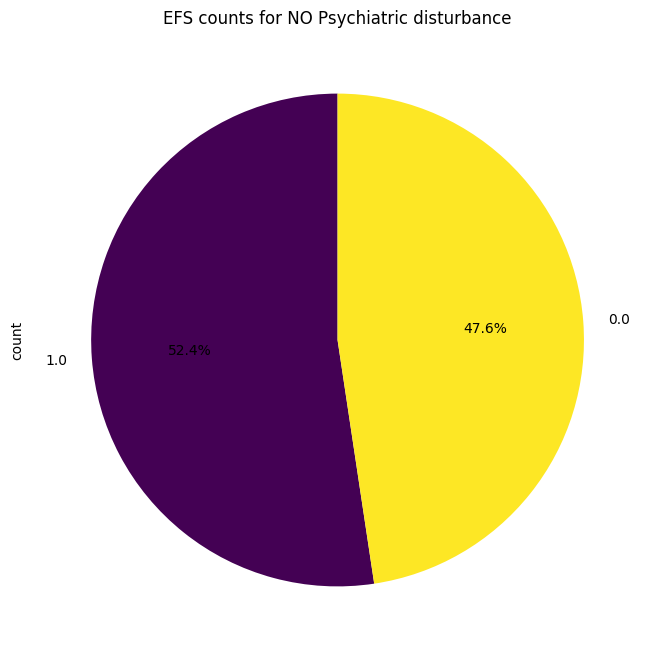

In [18]:
train_df_psych_disturb_no = train_df_psych_disturb[train_df_psych_disturb["psych_disturb"] == 'No']
# pie chart of the distribution of the different values of psych_disturb
# Get the value counts for the column
value_counts = train_df_psych_disturb_no['efs'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
value_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')

# Add a title
plt.title('EFS counts for NO Psychiatric disturbance')

# Equal aspect ratio ensures pie is drawn as a circle
plt.gca().set_aspect('equal')

# Show the plot
plt.show()

Insight:

- From the above pie chat we can see that the distribution of the positive and negative class is quite uniform for **NO** pshyc_disturb.

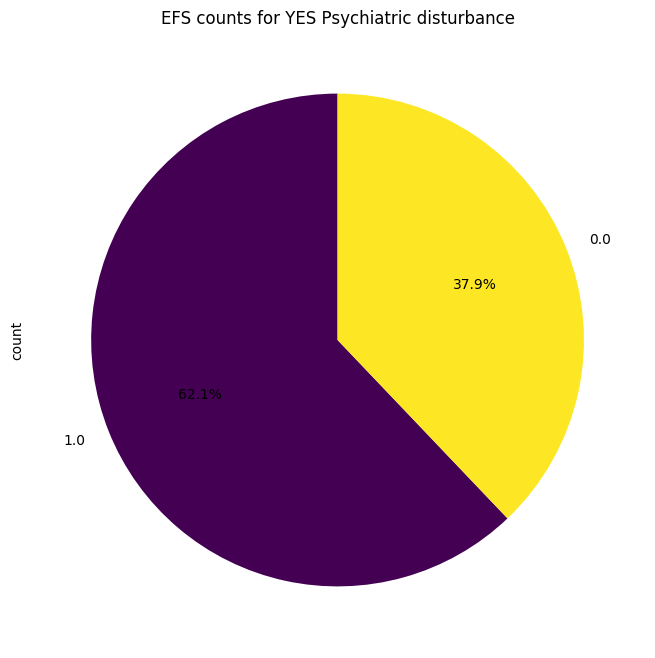

In [20]:
train_df_psych_disturb_yes = train_df_psych_disturb[train_df_psych_disturb["psych_disturb"] == 'Yes']
# pie chart of the distribution of the different values of psych_disturb
# Get the value counts for the column
value_counts = train_df_psych_disturb_yes['efs'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
value_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')

# Add a title
plt.title('EFS counts for YES Psychiatric disturbance')

# Equal aspect ratio ensures pie is drawn as a circle
plt.gca().set_aspect('equal')

# Show the plot
plt.show()

Insight:

- People with Psychiatric disturbance is more prone to Events.  

## EDA for Cytogenic Score

A cytogenetic score is a quantitative or qualitative assessment of chromosomal abnormalities in a patient's cells, particularly in the context of hematologic malignancies like acute myeloid leukemia (AML) or myelodysplastic syndromes (MDS). It is primarily used to stratify patients into prognostic risk categories, helping clinicians make informed treatment decisions.

In [21]:
train_df_cyto_score  = train_csv
# drop the nan columns
#drop all nan rows
train_df_cyto_score = train_df_cyto_score.dropna(subset=['cyto_score'])
print("the new df length is : ", len(train_df_cyto_score))

the new df length is :  20732


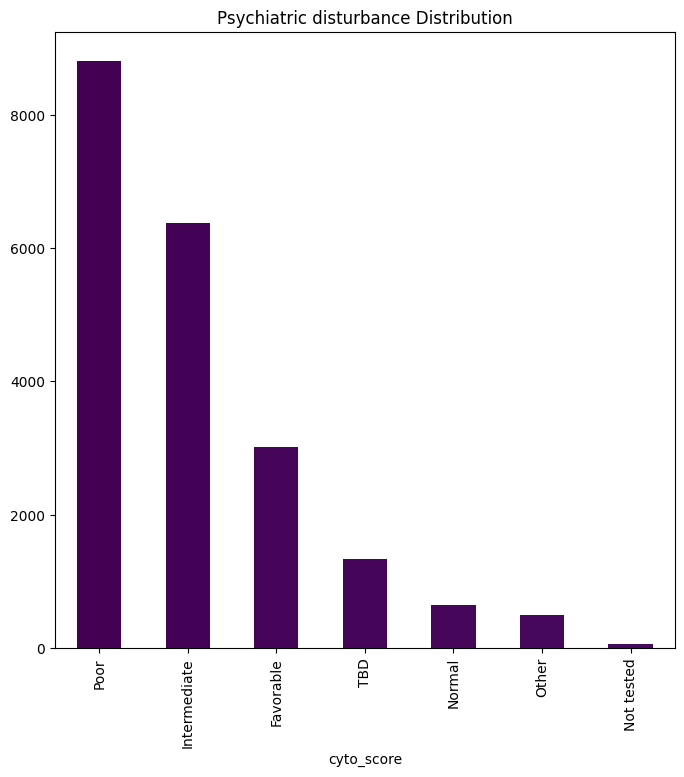

In [25]:
# pie chart of the distribution of the different values of psych_disturb
# Get the value counts for the column
value_counts = train_df_cyto_score['cyto_score'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
value_counts.plot(kind='bar', color=plt.cm.viridis(range(len(value_counts))))
# Add a title
plt.title('Psychiatric disturbance Distribution')


# Show the plot
plt.show()

Insight :abs

- Significant amount of patients have poor and intermediate Cytogenetic Score.
- The good thing is the number not tested is very low.
- At the same time the number of Nan s were also very high.

length of df :  8802


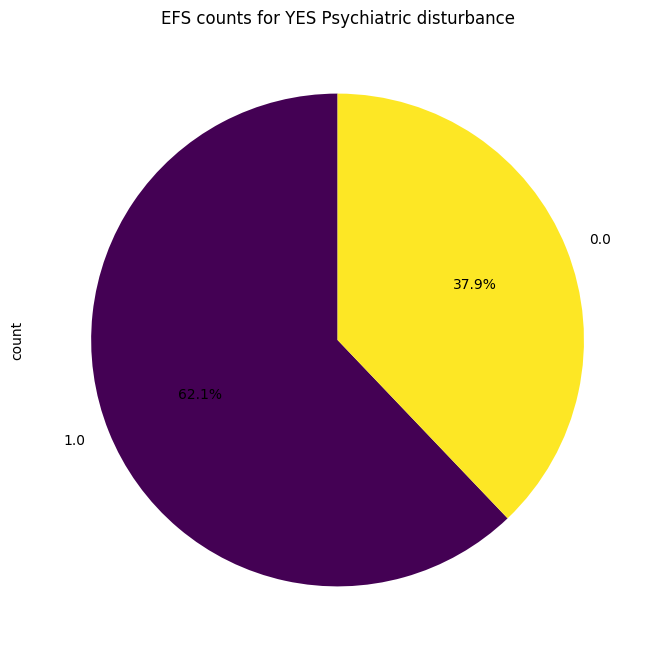

In [29]:
# let's say if Cyto Score is  Poor what is the distribution of EFS
train_df_cyto_score_poor = train_df_cyto_score[train_df_cyto_score['cyto_score'] == "Poor"]
print("length of df : ", len(train_df_cyto_score_poor))
value_counts = train_df_cyto_score_poor['efs'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
value_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')

# Add a title
plt.title('EFS counts for YES Psychiatric disturbance')

# Equal aspect ratio ensures pie is drawn as a circle
plt.gca().set_aspect('equal')

# Show the plot
plt.show()

Insight : 
- Patients with Poor Cyto_score have more chances of Events.